# Ames IA Home Price Prediction

## Data Import & Cleaning (1/3)

## Contents
- [Data Import (The Train Dataset)](#Data-Import-(The-Train-Dataset))
- [Data Cleaning (The Train Dataset)](#Data-Cleaning-(The-Train-Dataset))
- [Data Import (The Test Dataset)](#Data-Import-(The-Test-Dataset))
- [Data Cleaning (The Test Dataset)](#Data-Cleaning-(The-Test-Dataset))
- [Data Dictionary](#Data-Dictionary)

## Data Import (The Train Dataset)

### All libraries

In [1]:
# Imports libraries 
import numpy as np
import pandas as pd 
import missingno as msno

In [2]:
# There are so many columns in dataset. 
# Check to see the max number of row and columns display   
# Reference: (https://pandas.pydata.org/docs/reference/api/pandas.get_option.html)
print(f"display max columns: {pd.get_option('display.max_columns')}")
print(f"display max rows: {pd.get_option('display.max_rows')}")

display max columns: 20
display max rows: 60


In [3]:
# Change the option to display with no max 
# Reference: (https://kakakakakku.hatenablog.com/entry/2021/04/19/090229)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### Read in the data

In [4]:
# Read in the data
train = pd.read_csv('../data/original/train.csv')

In [5]:
# Review
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [6]:
# Check data types and number of rows and columns in dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

 ## Data Cleaning (The Train Dataset)

### Check for missing and `NaN` values 

Missing values in different columns are handled differently. The `Pool QC`, `Misc Feature`, `Alley`, `Fence`, `Fireplace Qu` columns were dropped from the dataset, becauase they have over 1,000 missing values. 

In [7]:
# Check for missing values
train.isnull().sum().sort_values(ascending=False)

Pool QC            2042
Misc Feature       1986
Alley              1911
Fence              1651
Fireplace Qu       1000
Lot Frontage        330
Garage Finish       114
Garage Qual         114
Garage Yr Blt       114
Garage Cond         114
Garage Type         113
Bsmt Exposure        58
BsmtFin Type 2       56
BsmtFin Type 1       55
Bsmt Cond            55
Bsmt Qual            55
Mas Vnr Area         22
Mas Vnr Type         22
Bsmt Half Bath        2
Bsmt Full Bath        2
Garage Area           1
Total Bsmt SF         1
Bsmt Unf SF           1
BsmtFin SF 2          1
BsmtFin SF 1          1
Garage Cars           1
Mo Sold               0
Sale Type             0
Full Bath             0
Half Bath             0
Bedroom AbvGr         0
Kitchen AbvGr         0
Kitchen Qual          0
Yr Sold               0
Misc Val              0
Pool Area             0
Screen Porch          0
TotRms AbvGrd         0
Functional            0
Fireplaces            0
3Ssn Porch            0
Enclosed Porch  

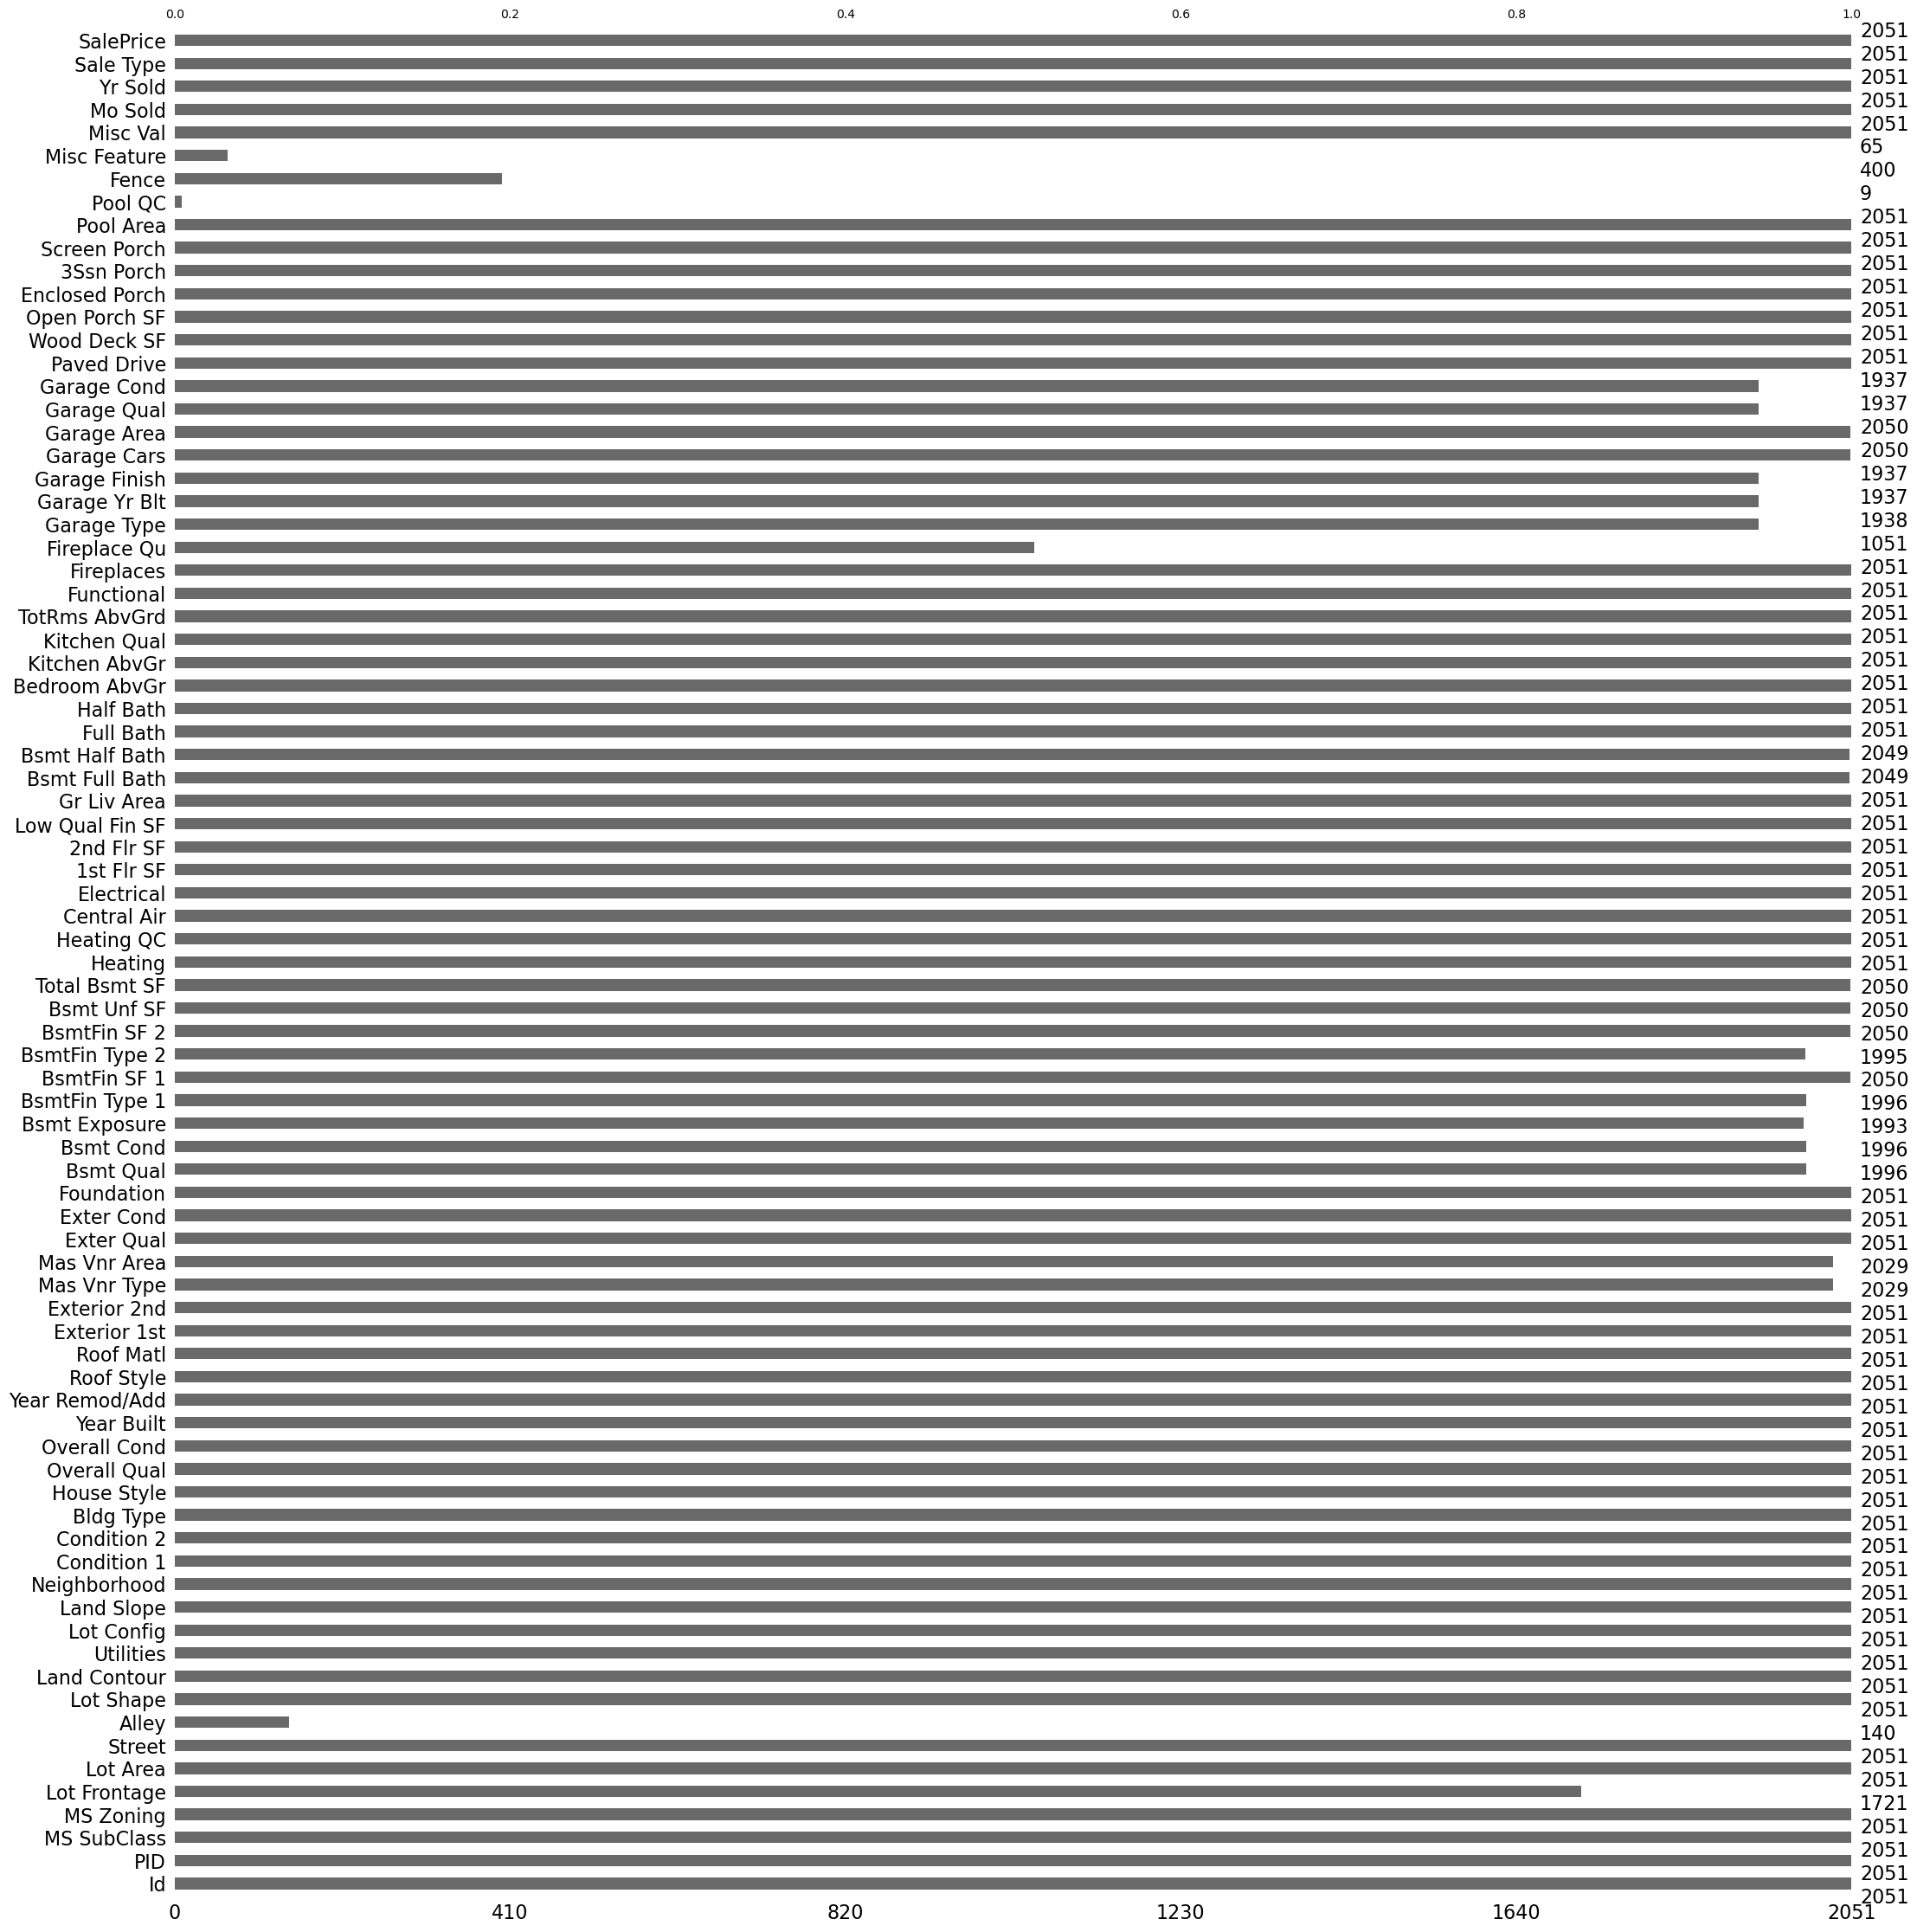

In [8]:
# Visualization missing values 
# Reference: (https://github.com/ResidentMario/missingno)
msno.bar(train.sample(2051));

In [9]:
# Review data types in columns where majority of values are missing
train[['Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Fireplace Qu']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Pool QC       9 non-null      object
 1   Misc Feature  65 non-null     object
 2   Alley         140 non-null    object
 3   Fence         400 non-null    object
 4   Fireplace Qu  1051 non-null   object
dtypes: object(5)
memory usage: 80.2+ KB


In [10]:
# Drop those columns with over 1_000 missing values 
train = train.drop(columns=['Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Fireplace Qu'], 
                   axis = 0)
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,0,3,2010,WD,138500


Missing values in `Garage Yr Blt` and `Lot Frontage` columns were filled with the median values of their respective columns, as the rest of the columns contain some numeric values. 

In [11]:
# For columns with float, review the description of the data 
train[['Garage Yr Blt', 'Mas Vnr Area', 'Lot Frontage', 'Bsmt Half Bath',
       'Bsmt Full Bath', 'Garage Area', 'Total Bsmt SF', 'Bsmt Unf SF',
       'BsmtFin SF 2', 'BsmtFin SF 1', 'Garage Cars'
      ]].describe()

,Garage Yr Blt,Mas Vnr Area,Lot Frontage,Bsmt Half Bath,Bsmt Full Bath,Garage Area,Total Bsmt SF,Bsmt Unf SF,BsmtFin SF 2,BsmtFin SF 1,Garage Cars
count,1937.000000,2029.000000,1721.000000,2049.000000,2049.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000
mean,1978.707796,99.695909,69.055200,0.063446,0.427526,473.671707,1057.987805,567.728293,47.959024,442.300488,1.776585
std,25.441094,174.963129,23.260653,0.251705,0.522673,215.934561,449.410704,444.954786,165.000901,461.204124,0.764537
min,1895.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1961.000000,0.000000,58.000000,0.000000,0.000000,319.000000,793.000000,220.000000,0.000000,0.000000,1.000000
50%,1980.000000,0.000000,68.000000,0.000000,0.000000,480.000000,994.500000,474.500000,0.000000,368.000000,2.000000
75%,2002.000000,161.000000,80.000000,0.000000,1.000000,576.000000,1318.750000,811.000000,0.000000,733.750000,2.000000
max,2207.000000,1600.000000,313.000000,2.000000,3.000000,1418.000000,6110.000000,2336.000000,1474.000000,5644.000000,5.000000


In [12]:
# Filled Garage Yr Blt and Lot Frontage by median, the variables all seem to have numbers (min)
train['Garage Yr Blt'] = train['Garage Yr Blt'].fillna(train['Garage Yr Blt'].median())
train['Lot Frontage'] = train['Lot Frontage'].fillna(train['Lot Frontage'].median())

The rest of the columns with missing or `NaN` values were filled with zeros (0). 

In [13]:
# Replace missing values to None
train.fillna(0, inplace=True)

In [14]:
# Check for missing values again
train.isnull().sum().sort_values(ascending=False)

Id                 0
Bsmt Half Bath     0
Functional         0
TotRms AbvGrd      0
Kitchen Qual       0
Kitchen AbvGr      0
Bedroom AbvGr      0
Half Bath          0
Full Bath          0
Bsmt Full Bath     0
PID                0
Gr Liv Area        0
Low Qual Fin SF    0
2nd Flr SF         0
1st Flr SF         0
Electrical         0
Central Air        0
Heating QC         0
Fireplaces         0
Garage Type        0
Garage Yr Blt      0
Garage Finish      0
Sale Type          0
Yr Sold            0
Mo Sold            0
Misc Val           0
Pool Area          0
Screen Porch       0
3Ssn Porch         0
Enclosed Porch     0
Open Porch SF      0
Wood Deck SF       0
Paved Drive        0
Garage Cond        0
Garage Qual        0
Garage Area        0
Garage Cars        0
Heating            0
Total Bsmt SF      0
Bsmt Unf SF        0
Overall Cond       0
House Style        0
Bldg Type          0
Condition 2        0
Condition 1        0
Neighborhood       0
Land Slope         0
Lot Config   

### Rename column names

The column names in the dataset was renamed with lowercase and snakecase to improve readability and consistency of code. 

In [15]:
# Check all the columns names
train.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Garage Type',
       'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 'G

In [16]:
# Change all column names to lowercase & snakecase     
# Reference: (GA Lesson: 306-Lesson-Model-Walkthrough)
train.columns = train.columns.str.lower().str.replace(' ', '_')
train.columns

Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area',
       'street', 'lot_shape', 'land_contour', 'utilities', 'lot_config',
       'land_slope', 'neighborhood', 'condition_1', 'condition_2', 'bldg_type',
       'house_style', 'overall_qual', 'overall_cond', 'year_built',
       'year_remod/add', 'roof_style', 'roof_matl', 'exterior_1st',
       'exterior_2nd', 'mas_vnr_type', 'mas_vnr_area', 'exter_qual',
       'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1', 'bsmtfin_sf_1', 'bsmtfin_type_2', 'bsmtfin_sf_2',
       'bsmt_unf_sf', 'total_bsmt_sf', 'heating', 'heating_qc', 'central_air',
       'electrical', '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf',
       'gr_liv_area', 'bsmt_full_bath', 'bsmt_half_bath', 'full_bath',
       'half_bath', 'bedroom_abvgr', 'kitchen_abvgr', 'kitchen_qual',
       'totrms_abvgrd', 'functional', 'fireplaces', 'garage_type',
       'garage_yr_blt', 'garage_finish', 'garage_cars', 'g

### Drop unnecessary columns

`pid` column was irrelevant and thus removed from the dataset. 

In [17]:
train.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,68.0,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,0,3,2010,WD,138500


In [18]:
# Delete pid
train.drop(columns='pid', axis=1, inplace=True)
train.head()

,id,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,60,RL,68.0,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,0,3,2010,WD,130500
1,544,60,RL,43.0,11492,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,0,4,2009,WD,220000
2,153,20,RL,68.0,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,0,1,2010,WD,109000
3,318,60,RL,73.0,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,0,4,2010,WD,174000
4,255,50,RL,82.0,14235,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,0,3,2010,WD,138500


In [19]:
train.shape

(2051, 75)

### Dummify columns

Columns with object data types are dummified and transformed into numerical values so that they can be used for analysis in a machine learning model. As a result, additional 168 columns were added to the dataset. 

In [20]:
# Select columns that have objects data types   #<--- Learned how to during GA 402-Lesson-knn class
train.select_dtypes('object').columns

Index(['ms_zoning', 'street', 'lot_shape', 'land_contour', 'utilities',
       'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'roof_style', 'roof_matl',
       'exterior_1st', 'exterior_2nd', 'mas_vnr_type', 'exter_qual',
       'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1', 'bsmtfin_type_2', 'heating', 'heating_qc',
       'central_air', 'electrical', 'kitchen_qual', 'functional',
       'garage_type', 'garage_finish', 'garage_qual', 'garage_cond',
       'paved_drive', 'sale_type'],
      dtype='object')

In [21]:
# Dummify all the columns with object data types
train_dummified = pd.get_dummies(data=train, columns=
                                 ['ms_zoning', 'street', 'lot_shape', 'land_contour', 
                                  'utilities','lot_config', 'land_slope', 
                                  'neighborhood', 'condition_1', 'condition_2', 
                                  'bldg_type', 'house_style', 'roof_style', 
                                  'roof_matl', 'exterior_1st', 'exterior_2nd', 
                                  'mas_vnr_type', 'exter_qual', 'exter_cond', 
                                  'foundation', 'bsmt_qual', 'bsmt_cond', 
                                  'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_type_2', 
                                  'heating', 'heating_qc', 'central_air', 
                                  'electrical', 'kitchen_qual', 'functional', 
                                  'garage_type', 'garage_finish', 'garage_qual', 
                                  'garage_cond', 'paved_drive', 'sale_type'], 
                                 drop_first = True)
# Display the first 5 rows of datasets
train_dummified.head()


,id,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_yr_blt,garage_cars,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,saleprice,ms_zoning_C (all),ms_zoning_FV,ms_zoning_I (all),ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,street_Pave,lot_shape_IR2,lot_shape_IR3,lot_shape_Reg,land_contour_HLS,land_contour_Low,land_contour_Lvl,utilities_NoSeWa,utilities_NoSewr,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside,land_slope_Mod,land_slope_Sev,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_GrnHill,neighborhood_IDOTRR,neighborhood_Landmrk,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,condition_1_Feedr,condition_1_Norm,condition_1_PosA,condition_1_PosN,condition_1_RRAe,condition_1_RRAn,condition_1_RRNe,condition_1_RRNn,condition_2_Feedr,condition_2_Norm,condition_2_PosA,condition_2_PosN,condition_2_RRAe,condition_2_RRAn,condition_2_RRNn,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,roof_style_Gable,roof_style_Gambrel,roof_style_Hip,roof_style_Mansard,roof_style_Shed,roof_matl_CompShg,roof_matl_Membran,roof_matl_Tar&Grv,roof_matl_WdShake,roof_matl_WdShngl,exterior_1st_AsphShn,exterior_1st_BrkComm,exterior_1st_BrkFace,exterior_1st_CBlock,exterior_1st_CemntBd,exterior_1st_HdBoard,exterior_1st_ImStucc,exterior_1st_MetalSd,exterior_1st_Plywood,exterior_1st_Stone,exterior_1st_Stucco,exterior_1st_VinylSd,exterior_1st_Wd Sdng,exterior_1st_WdShing,exterior_2nd_AsphShn,exterior_2nd_Brk Cmn,exterior_2nd_BrkFace,exterior_2nd_CBlock,exterior_2nd_CmentBd,exterior_2nd_HdBoard,exterior_2nd_ImStucc,exterior_2nd_MetalSd,exterior_2nd_Plywood,exterior_2nd_Stone,exterior_2nd_Stucco,exterior_2nd_VinylSd,exterior_2nd_Wd Sdng,exterior_2nd_Wd Shng,mas_vnr_type_BrkCmn,mas_vnr_type_BrkFace,mas_vnr_type_None,mas_vnr_type_Stone,exter_qual_Fa,exter_qual_Gd,exter_qual_TA,exter_cond_Fa,exter_cond_Gd,exter_cond_Po,exter_cond_TA,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,bsmt_qual_Ex,bsmt_qual_Fa,bsmt_qual_Gd,bsmt_qual_Po,bsmt_qual_TA,bsmt_cond_Ex,bsmt_cond_Fa,bsmt_cond_Gd,bsmt_cond_Po,bsmt_cond_TA,bsmt_exposure_Av,bsmt_exposure_Gd,bsmt_exposure_Mn,bsmt_exposure_No,bsmtfin_type_1_ALQ,bsmtfin_type_1_BLQ,bsmtfin_type_1_GLQ,bsmtfin_type_1_LwQ,bsmtfin_type_1_Rec,bsmtfin_type_1_Unf,bsmtfin_type_2_ALQ,bsmtfin_type_2_BLQ,bsmtfin_type_2_GLQ,bsmtfin_type_2_LwQ,bsmtfin_type_2_Rec,bsmtfin_type_2_Unf,heating_GasW,heating_Grav,heating_OthW,heating_Wall,heating_qc_Fa,heating_qc_Gd,heating_qc_Po,heating_qc_TA,central_air_Y,electrical_FuseF,electrical_FuseP,electrical_Mix,electrical_SBrkr,kitchen_qual_Fa,kitchen_qual_Gd,kitchen_qual_TA,functional_Maj2,functional_Min1,functional_Min2,functional_Mod,functional_Sal,functional_Sev,functional_Typ,garage_type_2Types,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,garage_finish_Fin,garage_finish_RFn,garage_finish_Unf,garage_qual_Ex,garage_qual_Fa,garage_qual_Gd,garage_qual_Po,garage_qual_TA,garage_cond_Ex,garage_cond_Fa,garage_cond_Gd,garage_cond_Po,garage_cond_TA,paved_drive_P,paved_drive_Y,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_Co

In [22]:
train_dummified.shape

(2051, 244)

### Save cleaned dataframe as csv files

Clean train dataset was saved as train_new.csv. Also, another new dataset with dummified columns are saved in train_dummified.csv. 

In [23]:
# Save train dataset in csv file
train.to_csv('../data/v1_train_clean.csv', index = False)

In [24]:
# Save dummified columns dataset in csv file
train_dummified.to_csv('../data/v2_train_clean_dummified.csv', index = False)

## Data Import (The Test Dataset)

The same data cleaning steps for the train dataset were also implemented for the test dataset in order to ensure that the test data is consistent with the trainining data, and to make sure that the machine learning model on the training data can be accurately evaluted on the test data later. 

### Read in the data

In [25]:
# Read the dataset 
test = pd.read_csv('../data/original/test.csv')

In [26]:
# Review
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [27]:
# Check data types and number of rows and columns in dataset
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               878 non-null    int64  
 1   PID              878 non-null    int64  
 2   MS SubClass      878 non-null    int64  
 3   MS Zoning        878 non-null    object 
 4   Lot Frontage     718 non-null    float64
 5   Lot Area         878 non-null    int64  
 6   Street           878 non-null    object 
 7   Alley            58 non-null     object 
 8   Lot Shape        878 non-null    object 
 9   Land Contour     878 non-null    object 
 10  Utilities        878 non-null    object 
 11  Lot Config       878 non-null    object 
 12  Land Slope       878 non-null    object 
 13  Neighborhood     878 non-null    object 
 14  Condition 1      878 non-null    object 
 15  Condition 2      878 non-null    object 
 16  Bldg Type        878 non-null    object 
 17  House Style     

## Data Cleaning (The Test Dataset)

### Check for missing and `NaN` values 

In [28]:
# Check missing values
test.isnull().sum().sort_values(ascending=False)

Pool QC            874
Misc Feature       837
Alley              820
Fence              706
Fireplace Qu       422
Lot Frontage       160
Garage Yr Blt       45
Garage Finish       45
Garage Qual         45
Garage Cond         45
Garage Type         44
BsmtFin Type 1      25
Bsmt Qual           25
Bsmt Cond           25
Bsmt Exposure       25
BsmtFin Type 2      25
Electrical           1
Mas Vnr Type         1
Mas Vnr Area         1
Kitchen AbvGr        0
TotRms AbvGrd        0
Bedroom AbvGr        0
Half Bath            0
Full Bath            0
Bsmt Half Bath       0
Bsmt Full Bath       0
Gr Liv Area          0
Kitchen Qual         0
Id                   0
Functional           0
Fireplaces           0
2nd Flr SF           0
Garage Cars          0
Garage Area          0
Paved Drive          0
Wood Deck SF         0
Open Porch SF        0
Enclosed Porch       0
3Ssn Porch           0
Screen Porch         0
Pool Area            0
Misc Val             0
Mo Sold              0
Yr Sold    

In [29]:
# Drop those columns with over 1_000 missing values 
test = test.drop(columns=['Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Fireplace Qu'], 
                 axis = 0)
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,0,7,2009,WD


In [30]:
# Filled Garage Yr Blt and Lot Frontage by median, the variables all seem to have numbers (min)
test['Garage Yr Blt'] = test['Garage Yr Blt'].fillna(test['Garage Yr Blt'].median())
test['Lot Frontage'] = test['Lot Frontage'].fillna(test['Lot Frontage'].median())

In [31]:
# Replace missing values to None
test.fillna(0, inplace=True)

In [32]:
# Check missing values again
test.isnull().sum().sort_values(ascending=False)

Id                 0
Fireplaces         0
TotRms AbvGrd      0
Kitchen Qual       0
Kitchen AbvGr      0
Bedroom AbvGr      0
Half Bath          0
Full Bath          0
Bsmt Half Bath     0
Bsmt Full Bath     0
Gr Liv Area        0
Low Qual Fin SF    0
2nd Flr SF         0
1st Flr SF         0
Electrical         0
Central Air        0
Heating QC         0
Functional         0
Garage Type        0
Total Bsmt SF      0
Garage Yr Blt      0
Yr Sold            0
Mo Sold            0
Misc Val           0
Pool Area          0
Screen Porch       0
3Ssn Porch         0
Enclosed Porch     0
Open Porch SF      0
Wood Deck SF       0
Paved Drive        0
Garage Cond        0
Garage Qual        0
Garage Area        0
Garage Cars        0
Garage Finish      0
Heating            0
Bsmt Unf SF        0
PID                0
Overall Cond       0
House Style        0
Bldg Type          0
Condition 2        0
Condition 1        0
Neighborhood       0
Land Slope         0
Lot Config         0
Utilities    

### Rename column names

In [33]:
# Check all the columns names
test.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Garage Type',
       'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 'G

In [34]:
# Change all column names to lowercase & snakecase     #<--- Learned how to during GA 306-Lesson-Model-Walkthrough class
test.columns = test.columns.str.lower().str.replace(' ', '_')
test.columns

Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area',
       'street', 'lot_shape', 'land_contour', 'utilities', 'lot_config',
       'land_slope', 'neighborhood', 'condition_1', 'condition_2', 'bldg_type',
       'house_style', 'overall_qual', 'overall_cond', 'year_built',
       'year_remod/add', 'roof_style', 'roof_matl', 'exterior_1st',
       'exterior_2nd', 'mas_vnr_type', 'mas_vnr_area', 'exter_qual',
       'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1', 'bsmtfin_sf_1', 'bsmtfin_type_2', 'bsmtfin_sf_2',
       'bsmt_unf_sf', 'total_bsmt_sf', 'heating', 'heating_qc', 'central_air',
       'electrical', '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf',
       'gr_liv_area', 'bsmt_full_bath', 'bsmt_half_bath', 'full_bath',
       'half_bath', 'bedroom_abvgr', 'kitchen_abvgr', 'kitchen_qual',
       'totrms_abvgrd', 'functional', 'fireplaces', 'garage_type',
       'garage_yr_blt', 'garage_finish', 'garage_cars', 'g

### Drop unnecessary columns

In [35]:
test.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type
0,2658,902301120,190,RM,69.0,9142,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,0,4,2006,WD
1,2718,905108090,90,RL,68.0,9662,Pave,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,0,7,2007,WD
4,625,535105100,20,RL,68.0,9500,Pave,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,0,7,2009,WD


In [36]:
# Delete pid and id
test.drop(columns='pid', axis=1, inplace=True)
test.head()

,id,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type
0,2658,190,RM,69.0,9142,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,0,4,2006,WD
1,2718,90,RL,68.0,9662,Pave,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,0,8,2006,WD
2,2414,60,RL,58.0,17104,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,0,9,2006,New
3,1989,30,RM,60.0,8520,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,0,7,2007,WD
4,625,20,RL,68.0,9500,Pave,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,0,7,2009,WD


### Dummify columns

In [37]:
# Select columns that have objects data types   #<--- Learned how to during GA 402-Lesson-knn class
test.select_dtypes('object').columns

Index(['ms_zoning', 'street', 'lot_shape', 'land_contour', 'utilities',
       'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'roof_style', 'roof_matl',
       'exterior_1st', 'exterior_2nd', 'mas_vnr_type', 'exter_qual',
       'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1', 'bsmtfin_type_2', 'heating', 'heating_qc',
       'central_air', 'electrical', 'kitchen_qual', 'functional',
       'garage_type', 'garage_finish', 'garage_qual', 'garage_cond',
       'paved_drive', 'sale_type'],
      dtype='object')

In [38]:
# Dummify all the columns with object data types
test_dummified = pd.get_dummies(data=test, columns=
                                ['ms_zoning', 'street', 'lot_shape', 'land_contour', 
                                 'utilities','lot_config', 'land_slope', 
                                 'neighborhood', 'condition_1', 'condition_2', 
                                 'bldg_type', 'house_style', 'roof_style', 'roof_matl', 
                                 'exterior_1st', 'exterior_2nd', 'mas_vnr_type', 
                                 'exter_qual', 'exter_cond', 'foundation', 
                                 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure', 
                                 'bsmtfin_type_1', 'bsmtfin_type_2', 'heating', 
                                 'heating_qc', 'central_air', 'electrical', 
                                 'kitchen_qual', 'functional', 'garage_type', 
                                 'garage_finish', 'garage_qual', 'garage_cond', 
                                 'paved_drive', 'sale_type'], drop_first = True)
# Display the first 5 rows of datasets
test_dummified.head()

,id,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_yr_blt,garage_cars,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,ms_zoning_FV,ms_zoning_I (all),ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,street_Pave,lot_shape_IR2,lot_shape_IR3,lot_shape_Reg,land_contour_HLS,land_contour_Low,land_contour_Lvl,utilities_NoSewr,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside,land_slope_Mod,land_slope_Sev,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_IDOTRR,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,condition_1_Feedr,condition_1_Norm,condition_1_PosA,condition_1_PosN,condition_1_RRAe,condition_1_RRAn,condition_1_RRNe,condition_1_RRNn,condition_2_Norm,condition_2_PosA,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,roof_style_Gable,roof_style_Gambrel,roof_style_Hip,roof_style_Mansard,roof_style_Shed,roof_matl_Metal,roof_matl_Roll,roof_matl_Tar&Grv,roof_matl_WdShake,roof_matl_WdShngl,exterior_1st_AsphShn,exterior_1st_BrkComm,exterior_1st_BrkFace,exterior_1st_CemntBd,exterior_1st_HdBoard,exterior_1st_MetalSd,exterior_1st_Plywood,exterior_1st_PreCast,exterior_1st_Stucco,exterior_1st_VinylSd,exterior_1st_Wd Sdng,exterior_1st_WdShing,exterior_2nd_AsphShn,exterior_2nd_Brk Cmn,exterior_2nd_BrkFace,exterior_2nd_CBlock,exterior_2nd_CmentBd,exterior_2nd_HdBoard,exterior_2nd_ImStucc,exterior_2nd_MetalSd,exterior_2nd_Other,exterior_2nd_Plywood,exterior_2nd_PreCast,exterior_2nd_Stucco,exterior_2nd_VinylSd,exterior_2nd_Wd Sdng,exterior_2nd_Wd Shng,mas_vnr_type_BrkCmn,mas_vnr_type_BrkFace,mas_vnr_type_CBlock,mas_vnr_type_None,mas_vnr_type_Stone,exter_qual_Fa,exter_qual_Gd,exter_qual_TA,exter_cond_Fa,exter_cond_Gd,exter_cond_Po,exter_cond_TA,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,bsmt_qual_Ex,bsmt_qual_Fa,bsmt_qual_Gd,bsmt_qual_Po,bsmt_qual_TA,bsmt_cond_Fa,bsmt_cond_Gd,bsmt_cond_TA,bsmt_exposure_Av,bsmt_exposure_Gd,bsmt_exposure_Mn,bsmt_exposure_No,bsmtfin_type_1_ALQ,bsmtfin_type_1_BLQ,bsmtfin_type_1_GLQ,bsmtfin_type_1_LwQ,bsmtfin_type_1_Rec,bsmtfin_type_1_Unf,bsmtfin_type_2_ALQ,bsmtfin_type_2_BLQ,bsmtfin_type_2_GLQ,bsmtfin_type_2_LwQ,bsmtfin_type_2_Rec,bsmtfin_type_2_Unf,heating_GasA,heating_GasW,heating_Grav,heating_qc_Fa,heating_qc_Gd,heating_qc_TA,central_air_Y,electrical_FuseA,electrical_FuseF,electrical_FuseP,electrical_SBrkr,kitchen_qual_Fa,kitchen_qual_Gd,kitchen_qual_Po,kitchen_qual_TA,functional_Maj2,functional_Min1,functional_Min2,functional_Mod,functional_Typ,garage_type_2Types,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,garage_finish_Fin,garage_finish_RFn,garage_finish_Unf,garage_qual_Fa,garage_qual_Gd,garage_qual_Po,garage_qual_TA,garage_cond_Ex,garage_cond_Fa,garage_cond_Gd,garage_cond_Po,garage_cond_TA,paved_drive_P,paved_drive_Y,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_VWD,sale_type_WD
0,2658,190,69.0,9142,6,8,1910,1950,0.0,0,0,1020,1020,908,1020,0,1928,0,0,2,0,4,2,9,0,1910.0,1,440,0,60,112,0,0,0,0,4,2006,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0

### Save cleaned dataframe as csv files

In [39]:
# Save test dataset in csv file
test.to_csv('../data/v1_test_clean.csv', index = False)

In [40]:
# Save dummified columns dataset in csv file
test_dummified.to_csv('../data/v2_test_clean_dummified.csv', index = False)

## Data Dictionary

|Feature|Type|Dataset|Description|
|---|---|---|---|
|Id|int64|
|PID|int64  
|MS SubClass|int64|20 1-STORY 1946 & NEWER ALL STYLES/ 30 1-STORY 1945 & OLDER/ 40 1-STORY W/FINISHED ATTIC ALL AGES/ 45 1-1/2 STORY - UNFINISHED ALL AGES/ 50 1-1/2 STORY FINISHED ALL AGES/ 60 2-STORY 1946 & NEWER/ 70 2-STORY 1945 & OLDER/ 75 2-1/2 STORY ALL AGES/ 80 SPLIT OR MULTI-LEVEL/ 85 SPLIT FOYER/ 90 DUPLEX - ALL STYLES AND AGES / 120 1-STORY PUD (Planned Unit Development) - 1946 & NEWER/ 150 1-1/2 STORY PUD - ALL AGES/ 160 2-STORY PUD - 1946 & NEWER/ 180 PUD - MULTILEVEL - INCL SPLIT LEV/FOYER/ 190 2 FAMILY CONVERSION - ALL STYLES AND AGES|MSSubClass: The building class|
|MS Zoning|object|A Agriculture/ C Commercial/ FV Floating Village Residential/ I * Industrial/ RH Residential High Density/ RL Residential Low Density/ RP Residential Low Density Park/ RM Residential Medium Density|Identifies the general zoning classification of the sale|
|Lot Frontage|float64||Linear feet of street connected to property|
|Lot Area|int64||Lot size in square feet|
|Street|object|Grvl Gravel / Pave Paved|Type of road access to property|
|Alley|object|Grvl Gravel/ Pave Paved/ NA No alley access|Type of alley access to property|
|Lot Shape|object|Reg Regular/ IR1 Slightly irregular/ IR2 Moderately Irregular/ IR3 Irregular|General shape of property|
|Land Contour|object|Lvl Near Flat/Level/ Bnk Banked - Quick and significant rise from street grade to building/ HLS Hillside - Significant slope from side to side/ Low Depression|Flatness of the property|
|Utilities|object|AllPub All public Utilities (E,G,W,& S)/ NoSewr Electricity, Gas, and Water (Septic Tank)/ NoSeWa Electricity and Gas Only/ ELO Electricity only|Type of utilities available|
|Lot Config|object|Inside Inside lot/ Corner Corner lot/ CulDSac Cul-de-sac/ FR2 Frontage on 2 sides of property/ FR3 Frontage on 3 sides of property|Lot configuration|
|Land Slope|object|Gtl Gentle slope/ Mod Moderate Slope/ Sev Severe Slope|Slope of property|
|Neighborhood|object|Blmngtn Bloomington Heights/ Blueste Bluestem/ BrDale Briardale/ BrkSide Brookside/ ClearCr Clear Creek/ CollgCr College Creek/ Crawfor Crawford/ Edwards Edwards/ Gilbert Gilbert/ IDOTRR Iowa DOT and Rail Road/ MeadowV Meadow Village/ Mitchel Mitchell/ Names North Ames/ NoRidge Northridge/ NPkVill Northpark Villa/ NridgHt Northridge Heights/ NWAmes Northwest Ames/ OldTown Old Town/ SWISU South & West of Iowa State University Sawyer Sawyer/ SawyerW Sawyer West/ Somerst Somerset/ StoneBr Stone Brook/ Timber Timberland/ Veenker Veenker|Physical locations within Ames city limits| 
|Condition 1|object|Artery Adjacent to arterial street/ Feedr Adjacent to feeder street/ Norm Normal/ RRNn Within 200' of North-South Railroad/ RRAn Adjacent to North-South Railroad/ PosN Near positive off-site feature--park, greenbelt, etc./ PosA Adjacent to postive off-site feature/ RRNe Within 200' of East-West Railroad/ RRAe Adjacent to East-West Railroad|Proximity to main road or railroad|
|Condition 2|object|Artery Adjacent to arterial street/ Feedr Adjacent to feeder street/ Norm Normal/ RRNn Within 200' of North-South Railroad/ RRAn Adjacent to North-South Railroad/ PosN Near positive off-site feature--park, greenbelt, etc./ PosA Adjacent to postive off-site feature/ RRNe Within 200' of East-West Railroad/ RRAe Adjacent to East-West Railroad|Proximity to main road or railroad (if a second is present)|
|Bldg Type|object|1Fam Single-family Detached/ 2FmCon Two-family Conversion; originally built as one-family / dwelling/ Duplx Duplex/ TwnhsE Townhouse End Unit/ TwnhsI Townhouse Inside Unit|Type of dwelling|
|House Style|object|1Story One story/ 1.5Fin One and one-half story: 2nd level finished/ 1.5Unf One and one-half story: 2nd level unfinished/ 2Story Two story/ 2.5Fin Two and one-half story: 2nd level finished/ 2.5Unf Two and one-half story: 2nd level unfinished/ SFoyer Split Foyer/ SLvl Split Level|Style of dwelling|
|Overall Qual|int64|10 Very Excellent/ 9 Excellent/ 8 Very Good/ 7 Good/ 6 Above Average/ 5 Average/ 4 Below  Average/ 3 Fair/ 2 Poor/ 1 Very Poor|Overall material and finish quality|
|Overall Cond|int64|10 Very Excellent/ 9 Excellent/ 8 Very Good/ 7 Good/ 6 Above Average/ 5 Average/ 4 Below Average/ 3 Fair/ 2 Poor/ 1 Very Poor|Overall condition rating|
|Year Built|int64||Original construction date|
|Year Remod/Add|int64||Remodel date (same as construction date if no remodeling or additions)|
|Roof Style|object|Flat Flat/ Gable Gable/ Gambrel Gabrel (Barn)/ Hip Hip/ Mansard Mansard/ Shed Shed|Type of roof|
|Roof Matl|object|ClyTile Clay or Tile/ CompShg Standard (Composite) Shingle/ Membran Membrane/ Metal Metal/ Roll Roll/ Tar&Grv Gravel & Tar/ WdShake Wood Shakes/ WdShngl Wood Shingles|Roof material|
|Exterior 1st|object|AsbShng Asbestos Shingles/ AsphShn Asphalt Shingles/ BrkComm Brick Common/ BrkFace Brick Face CBlock Cinder Block/ CemntBd Cement Board/ HdBoard Hard Board/ ImStucc Imitation Stucco/ MetalSd Metal Siding/ Other Other/ Plywood Plywood/ PreCast PreCast/ Stone Stone/ Stucco Stucco/ VinylSd Vinyl Siding/ Wd Sdng Wood Siding/ WdShing Wood Shingles|Exterior covering on house|
|Exterior 2nd|object|AsbShng Asbestos Shingles/ AsphShn Asphalt Shingles/ BrkComm Brick Common/ BrkFace Brick Face/ CBlock Cinder Block/ CemntBd Cement Board/ HdBoard Hard Board/ ImStucc Imitation Stucco/ MetalSd Metal Siding/ Other Other/ Plywood Plywood/ PreCast PreCast/ Stone Stone/ Stucco Stucco/ VinylSd Vinyl Siding/ Wd Sdng Wood Siding/ WdShing Wood Shingles|Exterior covering on house (if more than one material)|
|Mas Vnr Type|object|BrkCmn Brick Common/ BrkFace Brick Face/ CBlock Cinder Block/ None None/ Stone Stone|Masonry veneer type|
|Mas Vnr Area|float64||Masonry veneer area in square feet|
|Exter Qual|object|Ex Excellent/ Gd Good/ TA Average/Typical/ Fa Fair/ Po Poor|Exterior material quality|
|Exter Cond|object|Ex Excellent/ Gd Good/ TA Average/Typical/ Fa Fair/ Po Poor|Present condition of the material on the exterior|
|Foundation|object|BrkTil Brick & Tile/ CBlock Cinder Block/ PConc Poured Contrete/ Slab Slab/ Stone Stone/ Wood Wood|Type of foundation|
|Bsmt Qual|object|Ex Excellent (100+ inches)/ Gd Good (90-99 inches)/ TA Typical (80-89 inches)/ Fa Fair (70-79 inches)/ Po Poor (<70 inches)/ NA No Basement|Height of the basement|
|Bsmt Cond|object|Ex Excellent/ Gd Good/ TA Typical - slight dampness allowed/ Fa Fair - dampness or some cracking or settling/ Po Poor - Severe cracking, settling, or wetness/ NA No Basement|General condition of the basement|
|Bsmt Exposure|object|Gd Good Exposure/ Av Average Exposure (split levels or foyers typically score average or above)/ Mn Mimimum Exposure/ No No Exposure/ NA No Basement|Walkout or garden level basement walls|
|BsmtFin Type 1|object|GLQ Good Living Quarters/ ALQ Average Living Quarters/ BLQ Below Average Living Quarters/ Rec Average Rec Room/ LwQ Low Quality/ Unf Unfinshed/ NA No Basement|Quality of basement finished area|
|BsmtFin SF 1|float64||Type 1 finished square feet|
|BsmtFin Type 2|object|GLQ Good Living Quarters/ ALQ Average Living Quarters/ BLQ Below Average Living Quarters/ Rec Average Rec Room/ LwQ Low Quality/ Unf Unfinshed/ NA No Basement|Quality of second finished area (if present)|
|BsmtFin SF 2|float64||Type 2 finished square feet|
|Bsmt Unf SF|float64||Unfinished square feet of basement area|
|Total Bsmt SF|float64||Total square feet of basement area|
|Heating|object|Floor Floor Furnace/ GasA Gas forced warm air furnace/ GasW Gas hot water or steam heat/ Grav Gravity furnace/ OthW Hot water or steam heat other than gas/ Wall Wall furnace|Type of heating|
|Heating QC|object|Ex Excellent/ Gd Good/ TA Average/Typical/ Fa Fair/ Po Poor|Heating quality and condition|
|Central Air|object|N No/ Y Yes|Central air conditioning|
|Electrical|object|SBrkr Standard Circuit Breakers & Romex/ FuseA Fuse Box over 60 AMP and all Romex wiring (Average)/ FuseF 60 AMP Fuse Box and mostly Romex wiring (Fair)/ FuseP 60 AMP Fuse Box and mostly knob & tube wiring (poor)/ Mix Mixed|Electrical system|
|1st Flr SF|int64||First Floor square feet|
|2nd Flr SF|int64||Second floor square feet|
|Low Qual Fin SF|int64||Low quality finished square feet (all floors)|
|Gr Liv Area|int64||Above grade (ground) living area square feet|
|Bsmt Full Bath|float64||Basement full bathrooms|
|Bsmt Half Bath|float64||Basement half bathrooms| 
|Full Bath|int64||Full bathrooms above grade| 
|Half Bath|int64||Half baths above grade|
|Bedroom AbvGr|int64||Number of bedrooms above basement level|
|Kitchen AbvGr|int64||Number of kitchens|
|Kitchen Qual|object|Ex Excellent/ Gd Good/ TA Typical Average/ Fa Fair/ Po Poor|Kitchen quality|
|TotRms AbvGrd|int64||Total rooms above grade (does not include bathrooms)|
|Functional|object|Typ Typical Functionality/ Min1 Minor Deductions 1/ Min2 Minor Deductions 2/ Mod Moderate Deductions/ Maj1 Major Deductions 1/ Maj2 Major Deductions 2/ Sev Severely Damaged/ Sal Salvage only|Home functionality rating|
|Fireplaces|int64||Number of fireplaces|
|FireplaceQu|int64|Ex Excellent - Exceptional Masonry Fireplace/ Gd Good - Masonry Fireplace in main level/ TA Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement/ Fa Fair - Prefabricated Fireplace in basement/ Po Poor - Ben Franklin Stove/ NA No Fireplace|Fireplace quality|
|Garage Type|object|2Types More than one type of garage/ Attchd Attached to home/ Basment Basement Garage/ BuiltIn Built-In (Garage part of house - typically has room above garage)/ CarPort Car Port/ Detchd Detached from home/ NA No Garage|Garage location|
|Garage Yr Blt|float64||Year garage was built|
|Garage Finish|object|Fin Finished/ RFn Rough Finished/ Unf Unfinished/ NA No Garage|Interior finish of the garage|
|Garage Cars|float64||Size of garage in car capacity|
|Garage Area|float64||Size of garage in square feet|
|Garage Qual|object|Ex Excellent/ Gd Good/ TA Typical, Average/ Fa Fair/ Po Poor/ NA No Garage|Garage quality|
|Garage Cond|object|Ex Excellent/ Gd Good/ TA Typical, Average/ Fa Fair/ Po Poor/ NA No Garage|Garage condition|
|Paved Drive|object|Y Paved/ P Partial Pavement/ N Dirt/Gravel|Paved driveway|
|Wood Deck SF|int64||Wood deck area in square feet|
|Open Porch SF|int64||Open porch area in square feet| 
|Enclosed Porch|int64||Enclosed porch area in square feet|
|3Ssn Porch|int64||Three season porch area in square feet|
|Screen Porch|int64||Screen porch area in square feet|
|Pool Area|int64||Pool area in square feet|
|PoolQC|object|Ex Excellent/ Gd Good/ TA Average/Typical/ Fa Fair/ NA No Pool|Pool quality|
|Fence|object|GdPrv Good Privacy/ MnPrv Minimum Privacy/ GdWo Good Wood/ MnWw Minimum Wood/Wire/ NA No Fence|Fence quality|
|MiscFeature|object|Elev Elevator/ Gar2 2nd Garage (if not described in garage section)/ Othr Other/ Shed Shed (over 100 SF)/ TenC Tennis Court/ NA None|Miscellaneous feature not covered in other categories|
|Misc Val|int64||$Value of miscellaneous feature|
|Mo Sold|int64||Month Sold|
|Yr Sold|int64||Year Sold|
|Sale Type|object|WD Warranty Deed - Conventional/ CWD Warranty Deed - Cash/ VWD Warranty Deed - VA Loan/ New Home just constructed and sold/ COD Court Officer Deed/Estate/ Con Contract 15pct Down payment regular terms/ ConLw Contract Low Down payment and low interest/ ConLI Contract Low Interest/ ConLD Contract Low Down/ Oth Other|Type of sale|
|SalePrice|int64|n/a|the property's sale price in dollars. This is the target variable that you're trying to predict for this challenge|